# AdaBoost

In [150]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [151]:
df = pd.read_csv('./dataset/users_df_with_my_bot_indicator.csv')

In [152]:
var = sorted(df['lang'].unique())
mapping = dict(zip(var, range(0, len(var) + 1)))
df['lang_num'] = df['lang'].map(mapping).astype(int)
df.drop(columns='lang', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   11109 non-null  int64  
 1   name                                      11108 non-null  object 
 2   bot                                       11109 non-null  int64  
 3   created_at                                11109 non-null  object 
 4   statuses_count                            11109 non-null  int64  
 5   account_age_in_days                       11109 non-null  int64  
 6   number_of_tweets                          11109 non-null  int64  
 7   account_average_tweets_per_day            11109 non-null  float64
 8   avg_tweets_per_actual_day                 11109 non-null  float64
 9   day_with_most_tweets                      11109 non-null  object 
 10  max_number_of_tweets_in_a_day     

In [153]:
df = df[df.columns.difference(['user_id', 'name', 'created_at', 'day_with_most_tweets', 'account_age_in_days'])]
label = df.pop('bot')
df.pop('my_bot')
df
# Normalization
train_set, test_set, train_label, test_label = train_test_split(df, label, shuffle=True, test_size=0.30)

In [122]:
clf = AdaBoostClassifier()
clf.fit(train_set, train_label)

AdaBoostClassifier()

In [123]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79      1507
           1       0.79      0.96      0.87      1826

    accuracy                           0.84      3333
   macro avg       0.86      0.82      0.83      3333
weighted avg       0.86      0.84      0.83      3333



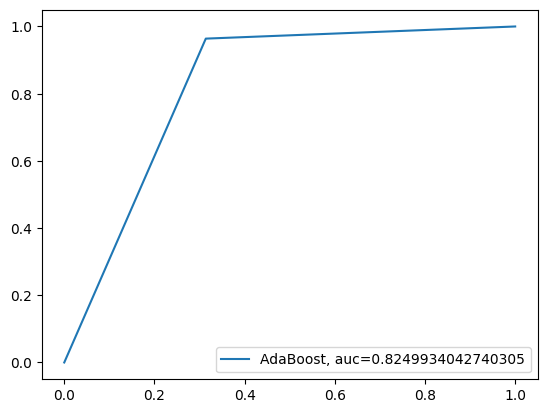

In [124]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

C:\Users\chuck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


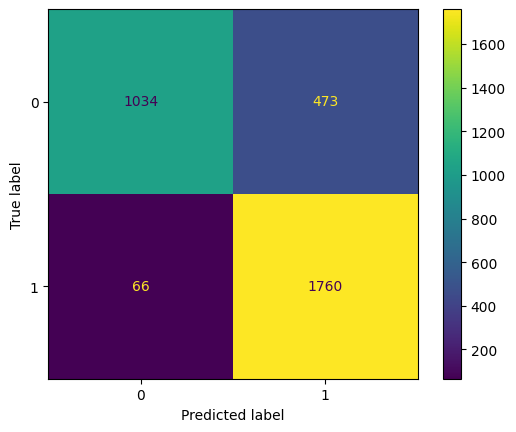

In [125]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [126]:
base = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=25)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=25,
                                                         min_samples_split=4),
                   learning_rate=0.05, n_estimators=200)

In [127]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1507
           1       0.79      0.94      0.86      1826

    accuracy                           0.83      3333
   macro avg       0.85      0.82      0.82      3333
weighted avg       0.84      0.83      0.83      3333



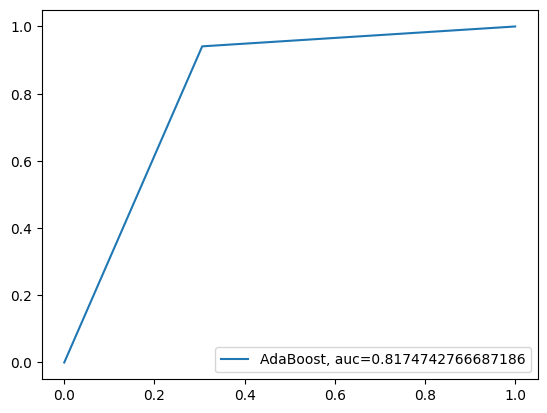

In [128]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

C:\Users\chuck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


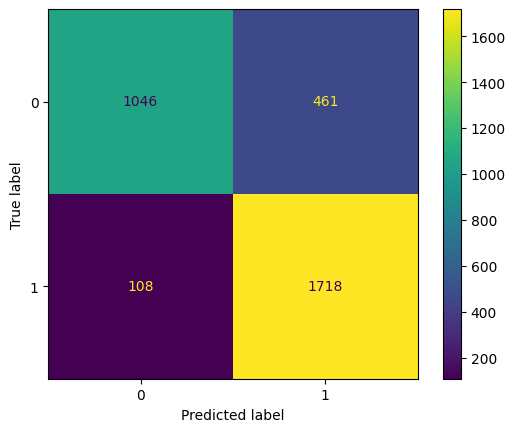

In [129]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [130]:
# Normalization
minmax_normalized_df = (df-df.min()) / (df.max()-df.min()) 
train_set, test_set, train_label, test_label = train_test_split(minmax_normalized_df, label, shuffle=True, test_size=0.30)

In [131]:
base = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=25)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=25,
                                                         min_samples_split=4),
                   learning_rate=0.05, n_estimators=200)

In [132]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1535
           1       0.78      0.94      0.86      1798

    accuracy                           0.83      3333
   macro avg       0.85      0.82      0.82      3333
weighted avg       0.84      0.83      0.83      3333



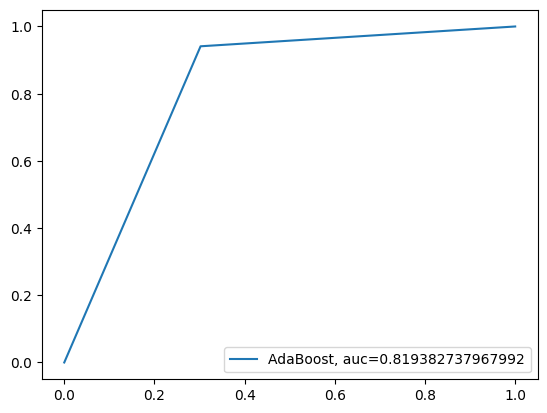

In [133]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

C:\Users\chuck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


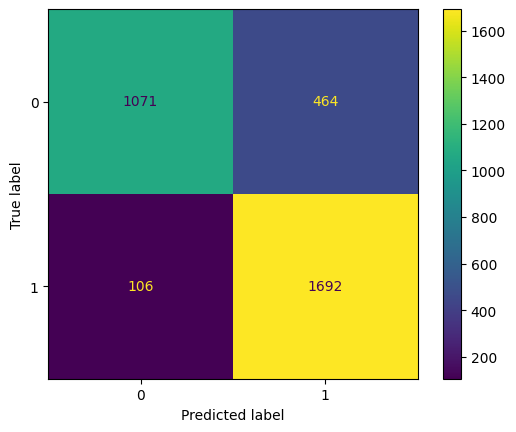

In [134]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [135]:
# Normalization with mean
mean_normalized_df = df / df.mean()
train_set, test_set, train_label, test_label = train_test_split(mean_normalized_df, label, shuffle=True, test_size=0.30)

In [136]:
base = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=25)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=25,
                                                         min_samples_split=4),
                   learning_rate=0.05, n_estimators=200)

In [137]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1495
           1       0.80      0.94      0.86      1838

    accuracy                           0.83      3333
   macro avg       0.85      0.82      0.83      3333
weighted avg       0.84      0.83      0.83      3333



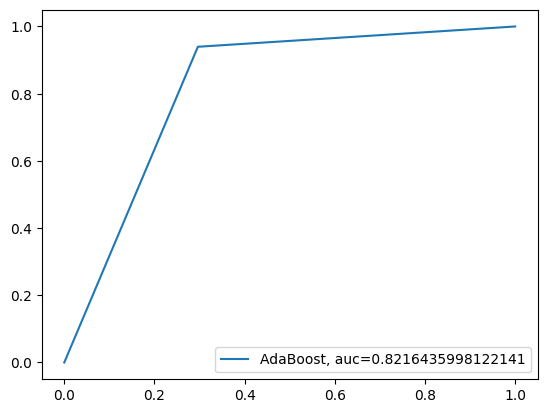

In [138]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

C:\Users\chuck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


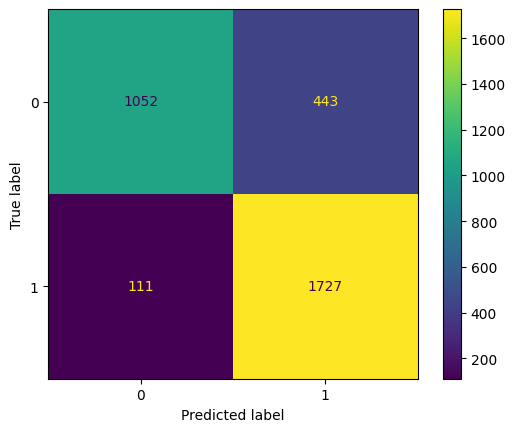

In [139]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [140]:
# Normalization with std dev
std_normalized_df = (df - df.mean()) / df.std()
train_set, test_set, train_label, test_label = train_test_split(std_normalized_df, label, shuffle=True, test_size=0.30)

In [141]:
base = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=25)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=25,
                                                         min_samples_split=4),
                   learning_rate=0.05, n_estimators=200)

In [142]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1487
           1       0.79      0.94      0.86      1846

    accuracy                           0.83      3333
   macro avg       0.84      0.82      0.82      3333
weighted avg       0.84      0.83      0.82      3333



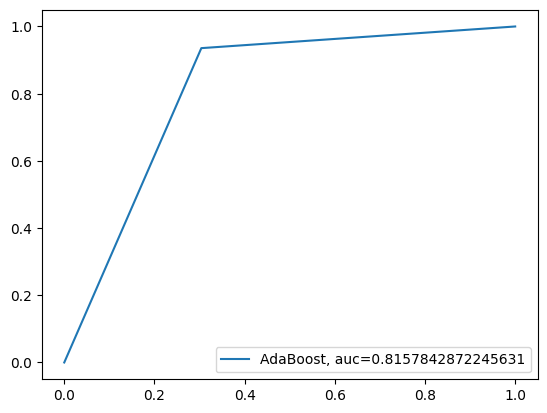

In [143]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

C:\Users\chuck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


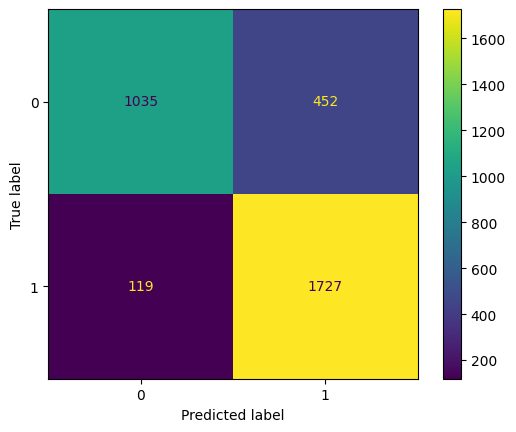

In [144]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 

In [145]:
# Normalization with std dev
max_normalized_df = df / df.max()
train_set, test_set, train_label, test_label = train_test_split(max_normalized_df, label, shuffle=True, test_size=0.30)

In [146]:
base = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=4, max_features=25)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=25,
                                                         min_samples_split=4),
                   learning_rate=0.05, n_estimators=200)

In [147]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1471
           1       0.79      0.95      0.86      1862

    accuracy                           0.83      3333
   macro avg       0.85      0.81      0.82      3333
weighted avg       0.84      0.83      0.82      3333



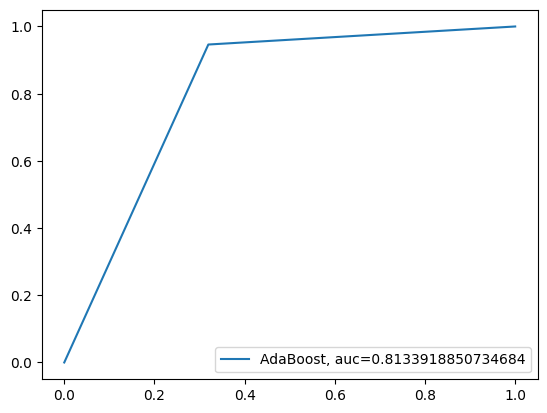

In [148]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

C:\Users\chuck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


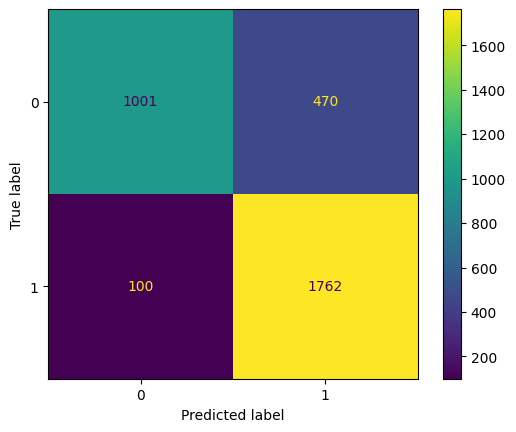

In [149]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_set, test_label)
plt.show() 